# Linear Regression (선형회귀)

$$Y=\beta_0+\beta_1X+\epsilon$$

- $\beta$ : coefficients
(시계열 데이터에는 적용 안됨)

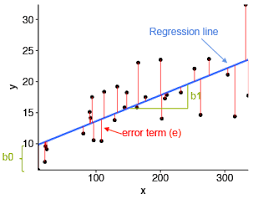


- 검은 점 : 실제 데이터
- 파란 선 : 모형을 추정한 선형
- 빨간 선 : 추정한 모형과 실제 값의 차이(잔차)
- 모형의 추정은 빨간 선을 제곱해서 극소점을 찾는 것

$$ \hat{\beta}_1=\frac{\sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^n (x_i-\bar{x})^2}$$

$$\hat{\beta}_0=\bar{y}-\hat{\beta}_1\bar{x}$$


## coefficients 추정 및 해석

- 추정된 $\beta$ 값들이 모형을 예측하는데 적합한가?
- p-value 확인할 필요가 있음
  - 통계적으로 유의미함을 계량화하는 수치

- 귀무가설 ($H_0$ : the null hypothesis)

  - $H_0$
  - 독립변수(X)와 종속변수(Y)는 no association

  - p-value가 0.05보다 작은 경우, 독립변수와 종속변수가 strong relationship을 가짐
  

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

In [2]:
uploaded=files.upload()

Saving data_LS.csv to data_LS.csv


In [3]:
df=pd.read_csv("data_LS.csv")

In [4]:
df.head()

,X,y
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


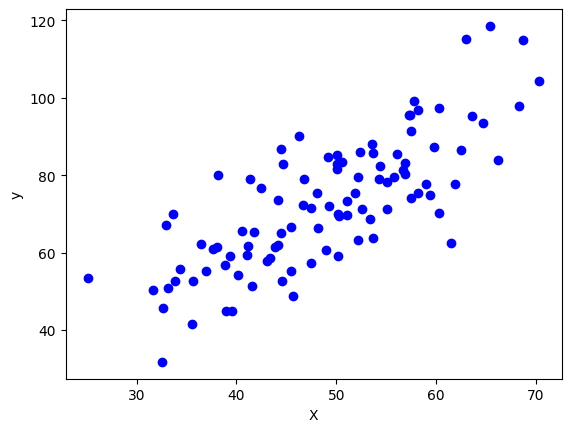

In [11]:
plt.scatter(df["X"], df["y"], color="b")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       100 non-null    float64
 1   y       100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [15]:
len(df["X"])

100

In [16]:
X=df.iloc[:,0]

In [18]:
y=df.iloc[:,1]

In [25]:
X_bar=np.mean(X)
y_bar=np.mean(y)

In [21]:
len(X)

100

In [33]:
#beta hat 공식을 코드로 만들기

num=0
den=0

for i in range(len(X)):
  num +=(X[i]-X_bar)*(y[i]-y_bar)
  den +=(X[i]-X_bar)**2

beta_1=num/den
beta_0=y_bar-beta_1*X_bar

print(beta_1, beta_0)

1.3224310226878686 7.991020985734423


In [34]:
y_pred= beta_0+beta_1*X

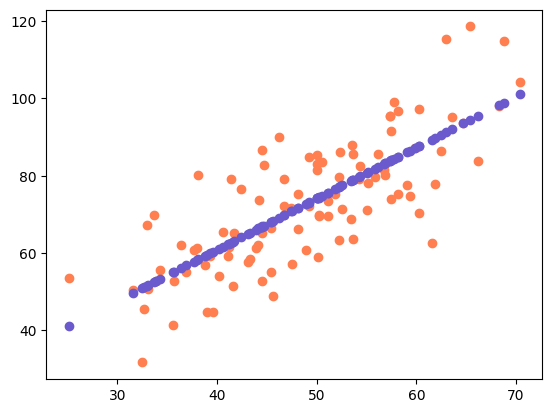

In [42]:
plt.scatter(X,y, color="coral")
plt.scatter(X, y_pred, color="slateblue")
plt.show()

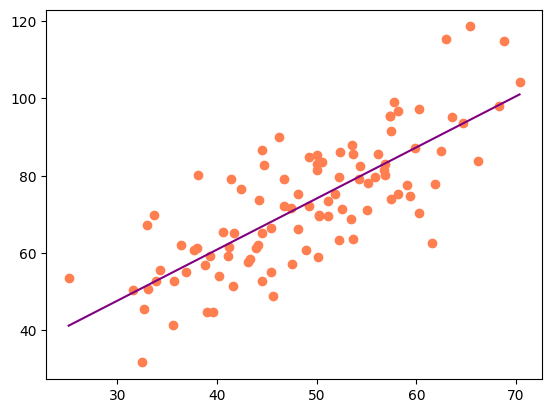

In [41]:
plt.scatter(X,y, color="coral")
plt.plot([min(X), max(X)], [min(y_pred), max(y_pred)], color="purple")
plt.show()

In [43]:
uploaded=files.upload()

Saving advertising.csv to advertising.csv


In [44]:
df=pd.read_csv("advertising.csv")

In [45]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [49]:
df.shape

(200, 4)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [50]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [52]:
df.isnull().sum() #결측치는 없다

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

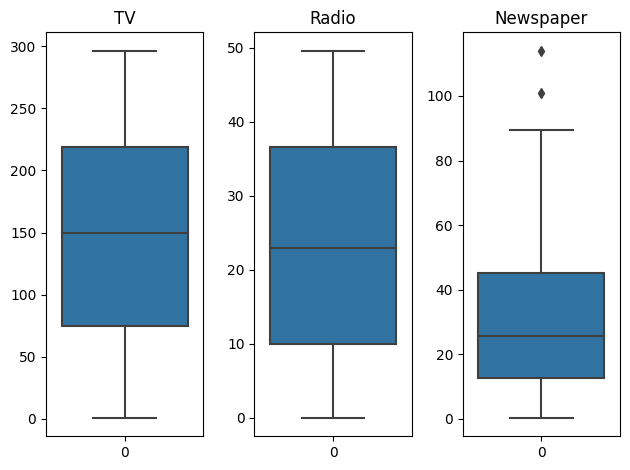

In [71]:
fig, ax=plt.subplots(1,3)
plt1=sns.boxplot(df["TV"],ax=ax[0]).set(title="TV")
plt2=sns.boxplot(df["Radio"], ax=ax[1]).set(title="Radio")
plt3=sns.boxplot(df["Newspaper"],ax=ax[2]).set(title="Newspaper")
plt.tight_layout()

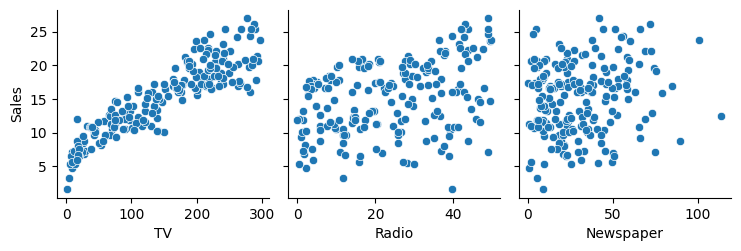

In [64]:
sns.pairplot(df, x_vars=["TV","Radio", "Newspaper"], y_vars="Sales", kind="scatter")
plt.show()

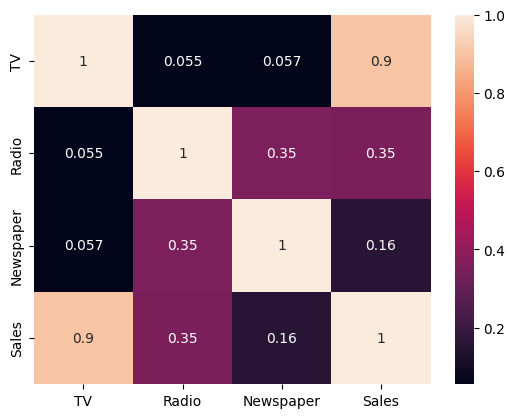

In [88]:
sns.heatmap(df.corr(), annot=True)
plt.show()


In [75]:
X=df["TV"]
y=df["Sales"]

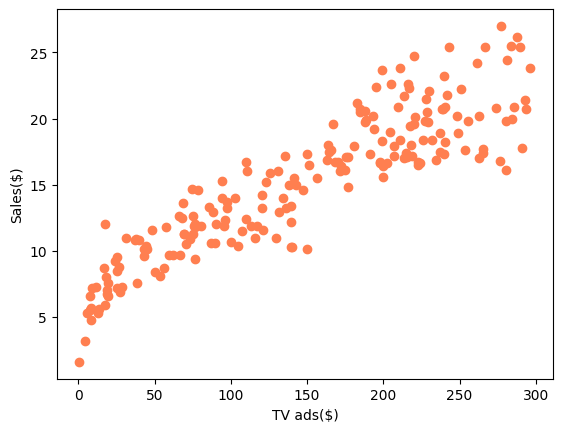

In [78]:
plt.scatter(df["TV"], df["Sales"], c="coral")
plt.xlabel("TV ads($)")
plt.ylabel("Sales($)")
plt.show()

In [80]:
import statsmodels.api as sm

In [85]:
X_sm=sm.add_constant(X) #constant가 중요. 한번만 실행해야지 여러번 하면 쌓임

In [87]:
X_sm.head()

,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [89]:
lr=sm.OLS(y, X_sm).fit()

In [94]:
print(lr.summary()) #p-value가 0.05보다 작으므로 귀무가설 부정 -> strong한 관계가 잇다
                    #TV에 $1를 투자하면, $0.05의 수익이 난다

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     856.2
Date:                Tue, 28 Nov 2023   Prob (F-statistic):           7.93e-74
Time:                        05:10:49   Log-Likelihood:                -448.99
No. Observations:                 200   AIC:                             902.0
Df Residuals:                     198   BIC:                             908.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9748      0.323     21.624      0.0

#### Results

1. coefficients $\beta$는 유의미함 (p-value 때문에)
2. TV의 coefficient $\beta_1$은 0.0555 (p-value : 0.000)
3. TV와 Sales의 관계를 나타내는 $\beta_1$은 통계적으로 유의미함

## $R^2$ R-squared (결정계수)
- 추정한 선형모형이 주어진 자료에 적합한 정도를 재는 척도
- 종속변수(y)의 분산 중에서 적합한 모형이 설명 가능한 부분의 비율을 의미함


  $$ Sales=6.9748+0.0555\times TV$$

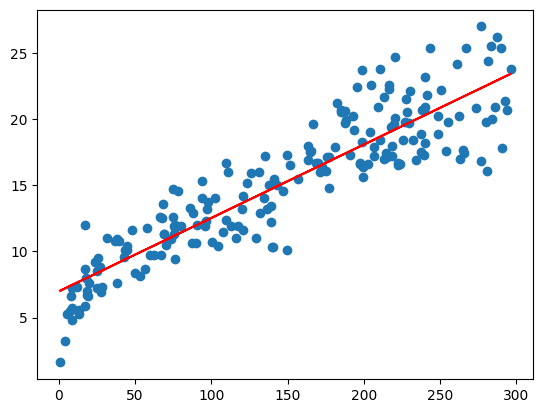

In [96]:
plt.scatter(X, y)
plt.plot(X, 6.9748+0.0555*X, color="r")
plt.show()

**과제 : 막 상관관계 분석하는게 아니고, 하나씩 분석해야함**
r^2가 의미하는게 모다~ p-value는 얼마고 이게 몬 뜻이다~


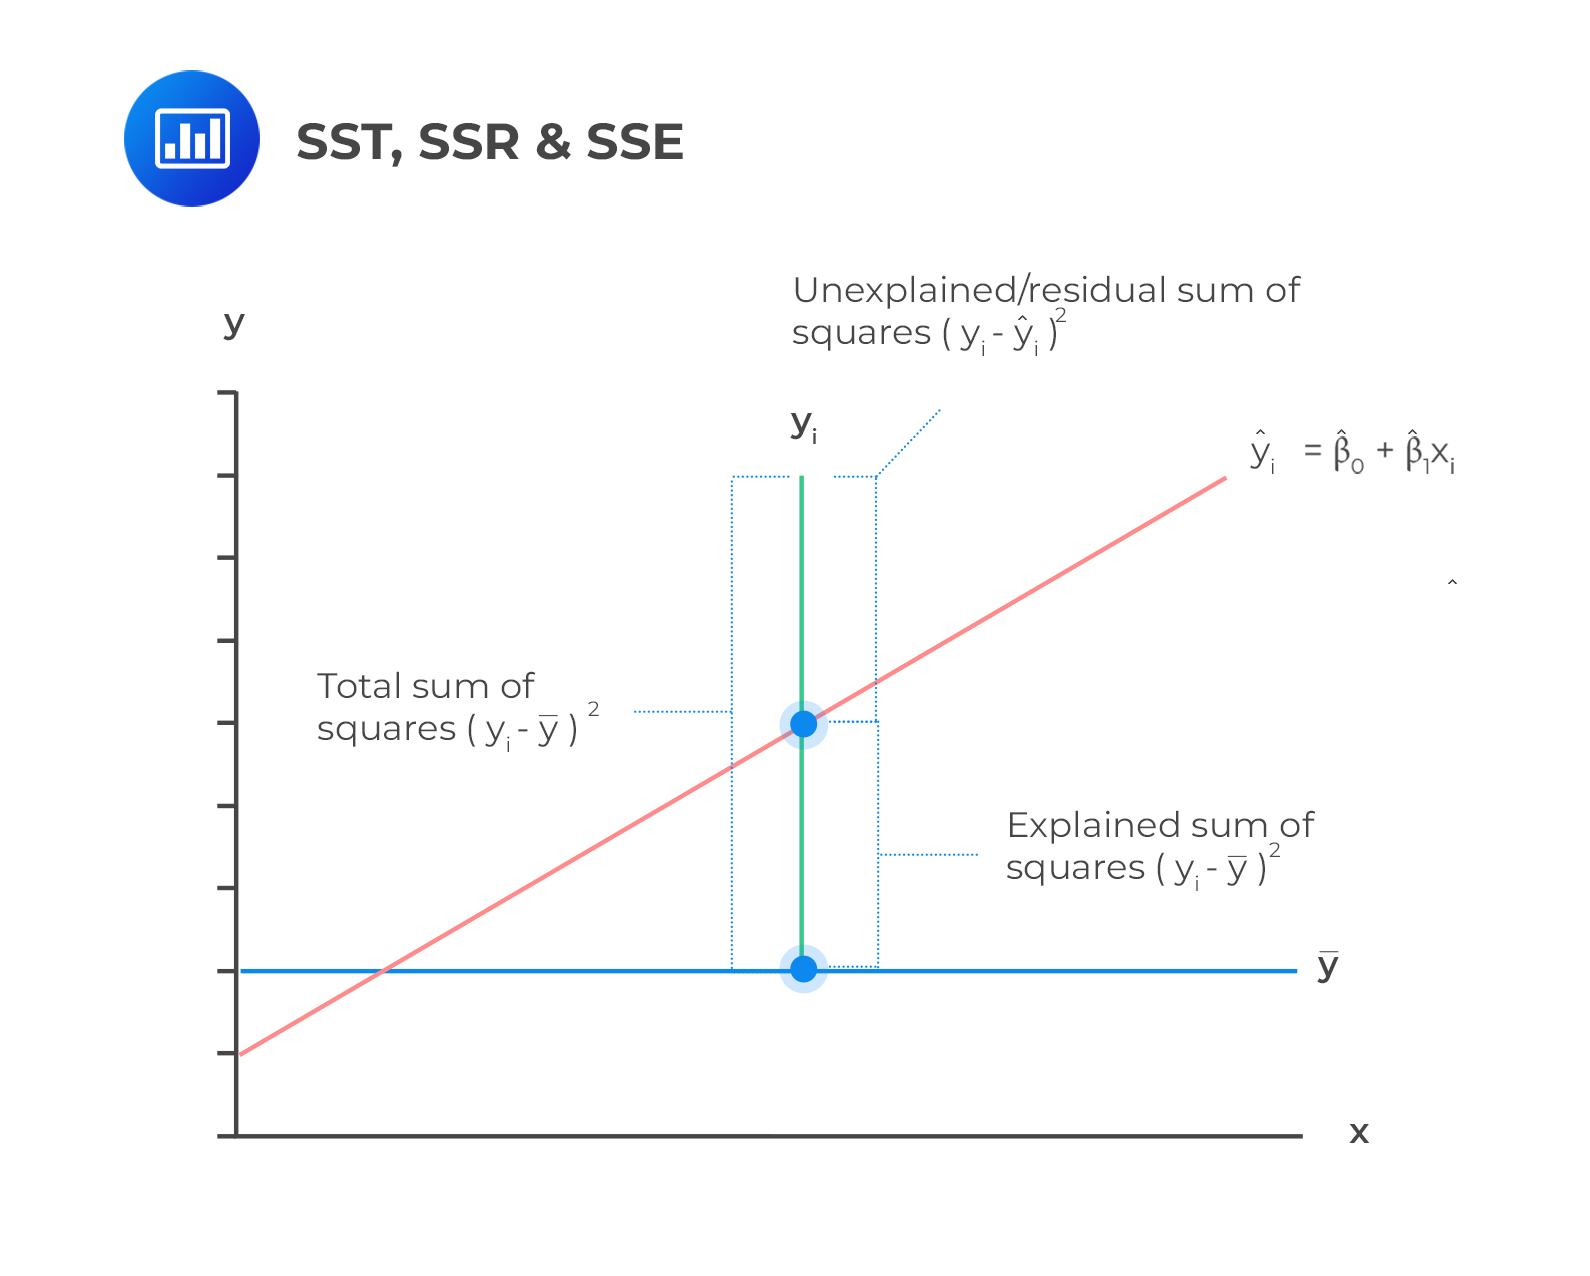

- SST(y의 전체 변동) : Total sum of squares
  $$\sum(y_i-\bar{y})^2 $$

- SSR(모형에 의해 설명되는 변동) : Explained sum of squares (residual sum of squares)
  $$\sum(\hat{y}_i-\bar{y})^2$$

- SSE(모형에 의해 설명되지 않은 변동) :오차의 제곱 Sum of squared error
  $$\sum(y_i-\hat{y}_i)^2$$

$$R^2=\frac{SSR}{SST}=\frac{1-SSE}{SST}=\frac{선형모형편차}{전체편차}$$

$$R^2\in[0,1]$$

In [97]:
y_pred=lr.predict(X_sm)
y_pred

0      19.737265
1       9.443004
2       7.928816
3      15.377734
4      17.002852
         ...    
195     9.093576
196    12.199603
197    16.792086
198    22.704630
199    19.848195
Length: 200, dtype: float64

In [98]:
res=y-y_pred

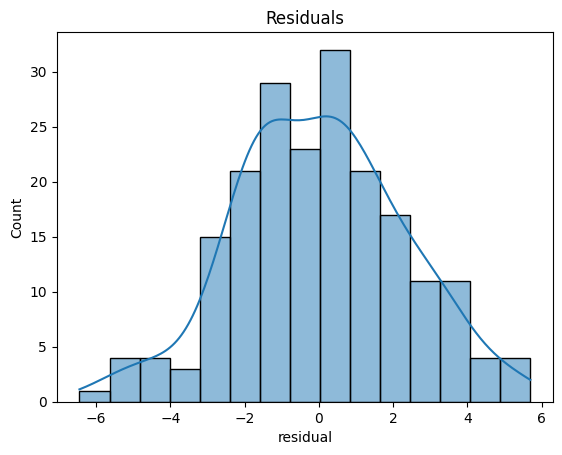

In [101]:
sns.histplot(res, bins=15, kde=True)
plt.title("Residuals")
plt.xlabel("residual")
plt.show()

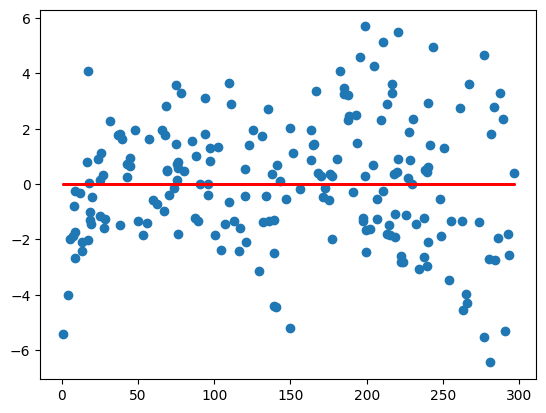

In [104]:
plt.scatter(X, res)
plt.plot(X, X*0, color="r", linewidth=2.0)
plt.show()

In [107]:
df.head() # 아직 radio 와 newspaper 가 남았음 -> 얘도 포함시켜보자(독립변수를 여러개로 해보자)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# Multiple linear regression

In [108]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [110]:
df.columns.difference(["Sales"]) #difference = 차집합

Index(['Newspaper', 'Radio', 'TV'], dtype='object')

In [113]:
df[df.columns.difference(["Sales"])]

,Newspaper,Radio,TV
0,69.2,37.8,230.1
1,45.1,39.3,44.5
2,69.3,45.9,17.2
3,58.5,41.3,151.5
4,58.4,10.8,180.8
...,...,...,...
195,13.8,3.7,38.2
196,8.1,4.9,94.2
197,6.4,9.3,177.0
198,66.2,42.0,283.6
